In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pwd

/home/justas/projects/github/ProteinMPNN/outputs/example_pssm_outputs


In [4]:
input_path = "./parsed_pdbs.jsonl"
output_path = "../../inputs/PSSM_inputs/"
mpnn_alphabet = 'ACDEFGHIKLMNPQRSTVWYX'

In [5]:
def softmax(x, T):
    return np.exp(x/T)/np.sum(np.exp(x/T), -1, keepdims=True)

In [6]:
X_mask = np.concatenate([np.zeros([1,20]), np.ones([1,1])], -1)

with open(input_path, 'r') as json_file:
    json_list = list(json_file)

my_dict = {}
for json_str in json_list:
    result = json.loads(json_str)
    all_chain_list = [item[-1:] for item in list(result) if item[:9]=='seq_chain']
    output_dict = {}
    for chain in all_chain_list:
        print(chain, len(result[f'seq_chain_{chain}']))
        output_dict[chain+"_coef"] = np.ones(len(result[f'seq_chain_{chain}']), dtype=np.float32)
        output_dict[chain+"_odds"] = np.ones((len(result[f'seq_chain_{chain}']),21))
        random_bias = np.random.normal(size=(len(result[f'seq_chain_{chain}']),21)) #input your own PSSM bias
        output_dict[chain+"_bias"] = softmax(random_bias-X_mask*1e8, 0.5) #making into probability distribution
    np.savez(output_path+result['name'], **output_dict)

A 143
B 143
C 143
A 227
B 4
C 227
D 4
E 227
F 4


In [8]:
a = np.load(output_path+'/3HTN.npz')

Text(0, 0.5, 'PSSM probability')

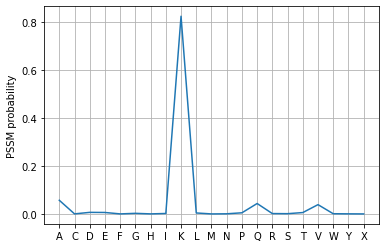

In [9]:
plt.plot(a['A_bias'][10,:]);
plt.xticks(np.arange(21), mpnn_alphabet);
plt.grid(True)
plt.ylabel('PSSM probability')